# Investigate Convergence of Longstaff-Schwarz

In [155]:
# Packages used
import numpy as np
import matplotlib.pyplot as plt
from scipy import odr
from helper import *
import keras
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [156]:
def GBM_exact(T, S, sigma, r, M):
    S_all = []
    S_all.append(S)
    dt = T/M
    Zm = np.random.normal(size=M)
    for i in range(M-1):
        S_all.append(S_all[i] * np.exp((r-0.5*sigma**2) * dt + sigma * np.sqrt(dt) * Zm[i])) 
    return S_all

## Increase N 

In [203]:
# Variables used
T = M = N = 10
K = 1.1
S = 1
sigma = 0.2
r = 0.06
dt = T/M

In [232]:
exponent = 5
base = [10**i for i in range(1, exponent)]
option_mean = np.zeros(exponent - 1)
option_se = np.zeros(exponent - 1)

print(base)

[10, 100, 1000, 10000]


In [233]:
# Define one simulation

for ii in range(len(base)):

    trial_mean = []
    trial_se = []

    for jj in range(5):

        s_all = np.array([np.array(GBM_exact(T, S, sigma, r, M)) for x in range(base[ii])])
        [option_cash_flow, cash_flows] = value_option_schwarz(T,M,K,s_all, r, base[ii], order=2, option="put")

        for time in range(option_cash_flow.shape[1]):
            option_cash_flow[:,time]*=np.exp(-r*(time*dt))

        data = np.zeros(base[ii])
        data[0:len(option_cash_flow[option_cash_flow > 0])] = option_cash_flow[option_cash_flow > 0]

        trial_mean.append(np.mean(data))
        trial_se.append(np.std(data)/base[ii])

    option_mean[ii] = np.mean(trial_mean)
    option_se[ii] = np.mean(trial_se)

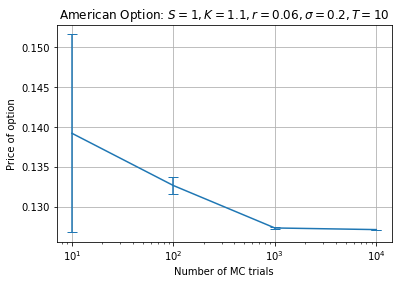

In [250]:
# Plot showing convergence of LSM
plt.errorbar(base, option_mean, yerr = option_se, barsabove=True, capsize = 5)
plt.xscale('log')
plt.xlabel('Number of MC trials')
plt.ylabel('Price of option')
plt.grid()
plt.title(f'American Option: $S = {S}, K = {K}, r = {r}, \sigma = {sigma}, T = {T}$')
plt.show()

In [251]:
BSM_put(S, K, r, sigma, dt)

0.10031374008344551

## Sensitivities

Compute sensitivy plots for sigma and strike price for European and American put option

In [257]:
# Variables used
T = M = N = 10
S = 1
sigma = 0.2
r = 0.06
dt = T/M

In [258]:
# Create OFAT range
Ks = np.linspace(1., 1.5, 30)
sigmas = np.linspace(0.1, 0.5, 30)

In [259]:
# Apply OFAT
X, Y = np.meshgrid(Ks, sigmas)
europeans = BSM_put(S, X, r, Y, dt)

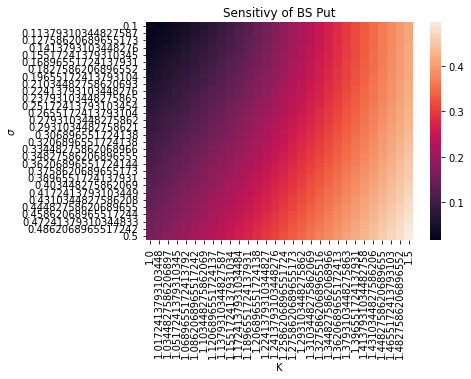

In [260]:
fig, ax = plt.subplots()
sns.heatmap(test, ax = ax, xticklabels = Ks, yticklabels = sigmas)
ax.set_xlabel('K')
ax.set_ylabel('$\sigma$')
ax.set_title('Sensitivy of BS Put')
plt.show()

In [261]:
def LSM_sensitivities(K, sigma):
    
    trials = 2000
    s_all = np.array([np.array(GBM_exact(T, S, sigma, r, M)) for x in range(trials)])
    [option_cash_flow, cash_flows] = value_option_schwarz(T, M, K, s_all, r, trials, order = 2, option="put")

    for time in range(option_cash_flow.shape[1]):
        option_cash_flow[:,time]*=np.exp(-r*(time*dt))
    return np.sum(option_cash_flow)/trials

In [262]:
americans = np.zeros((len(Ks), len(sigmas)))
for ii in tqdm(range(len(Ks))):
    for jj in range(len(sigmas)):
        americans[ii][jj] = LSM_sensitivities(Ks[ii], sigmas[jj])
        

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:21<00:00,  6.72s/it]


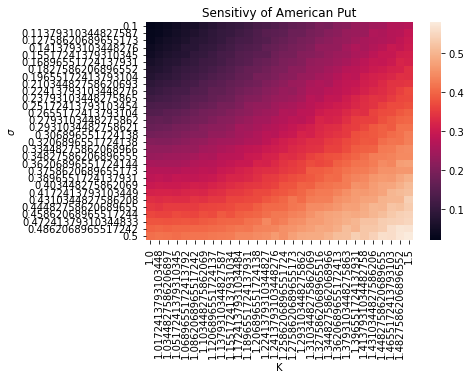

In [263]:
fig, ax = plt.subplots()
sns.heatmap(americans, ax = ax, xticklabels = Ks, yticklabels = sigmas)
ax.set_xlabel('K')
ax.set_ylabel('$\sigma$')
ax.set_title('Sensitivy of American Put')
plt.show()